# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [148]:
# Packages setup
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size']=14

In [24]:
# Samples and Epsilon setup

min_samples = np.arange(1,11)
epsilon = np.arange(0.05, 0.51,0.01)

In [26]:
# Data setup

X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
406390,8.693072,57.086466,41.912668
111956,9.709177,57.366395,5.359875
246198,8.178176,56.661887,1.687816
36703,10.063686,57.035660,1.601037
420155,10.421709,57.585527,2.184374


In [33]:
# Data scaling

X_scaled = X.copy()
X_scaled['alt'] = (X.alt - X.alt.mean())/X.alt.std()
X_scaled['lat'] = (X.lat - X.lat.mean())/X.lat.std()
X_scaled['lon'] = (X.lon - X.lon.mean())/X.lon.std()
X_scaled.head()

,lat,lon,alt
406390,-1.655123,0.005717,1.087067
111956,-0.032622,0.968760,-0.898902
246198,-2.477300,-1.454973,-1.098411
36703,0.533452,-0.169073,-1.103125
420155,1.105137,1.722644,-1.071432


In [36]:
# DBSCAN test setup

dbscan = DBSCAN(eps=.05,min_samples=1)
X_scaled.cluster = dbscan.fit_predict(X_scaled[['lat','lon', 'alt']])
metrics.silhouette_score(X_scaled[['lon', 'lat', 'alt']], X_scaled.cluster)

0.1531248445430671

In [38]:
# For loop
sil_scores = []
for m in min_samples:
    scores = []
    for eps in epsilon:
        
        dbscan = DBSCAN(eps=eps,min_samples=m)
        
        X_scaled.cluster = dbscan.fit_predict(X_scaled[['lat','lon', 'alt']])
        
        # calculate silouette score here
        score = metrics.silhouette_score(X_scaled[['lon', 'lat', 'alt']], X_scaled.cluster)
        
        scores.append(score)
        
    sil_scores.append(scores)

<IPython.core.display.Javascript object>


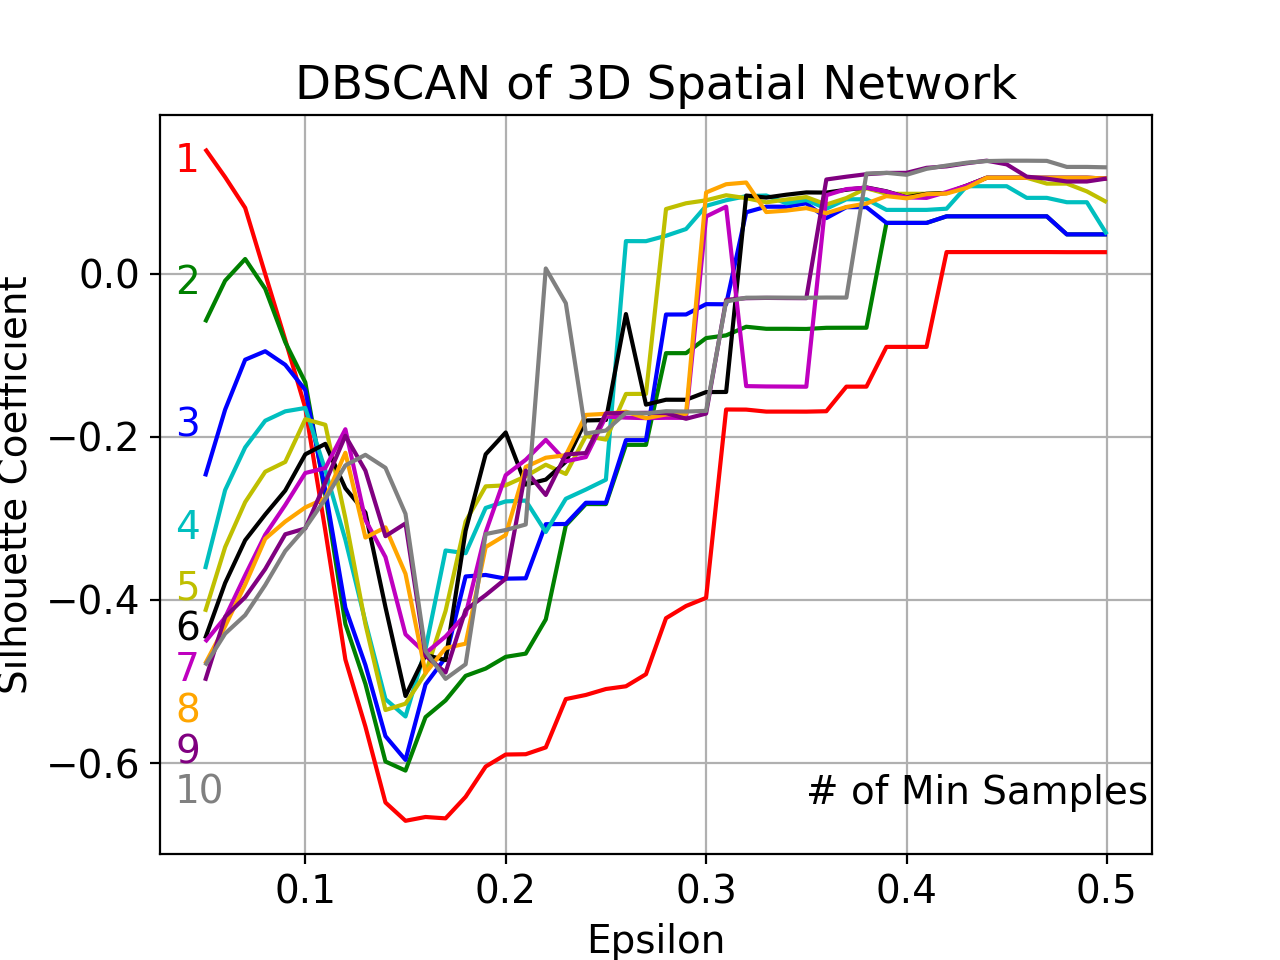

In [112]:
# Plotting the Results

from matplotlib.collections import LineCollection

sil_scores_array = np.asarray(sil_scores)
colors = ['r', 'g', 'b', 'c', 'y', 'k', 'm', 'orange', 'purple', 'grey']

plt_eps = np.tile(epsilon, sil_scores_array.shape[0]).reshape(*sil_scores_array.shape)
v = np.stack((plt_eps, sil_scores), axis = -1)
c = LineCollection(v, colors=colors)

fig, ax = plt.subplots()
ax.add_collection(c)
ax.autoscale()
ax.set_title('DBSCAN of 3D Spatial Network')
ax.annotate('1', xy=(0.04, 0.125), xytext=(0.035, 0.125), color = 'r')
ax.annotate('2', xy=(0.04, -0.025), xytext=(0.035, -0.025), color = 'g')
ax.annotate('3', xy=(0.04, -0.2), xytext=(0.035, -0.2), color = 'b')
ax.annotate('4', xy=(0.04, -0.325), xytext=(0.035, -0.325), color = 'c')
ax.annotate('5', xy=(0.04, -0.4), xytext=(0.035, -0.4), color = 'y')
ax.annotate('6', xy=(0.04, -0.45), xytext=(0.035, -0.45), color = 'k')
ax.annotate('7', xy=(0.04, -0.5), xytext=(0.035, -0.5), color = 'm')
ax.annotate('8', xy=(0.04, -0.55), xytext=(0.035, -0.55), color = 'orange')
ax.annotate('9', xy=(0.04, -0.6), xytext=(0.035, -0.6), color = 'purple')
ax.annotate('10', xy=(0.04, -0.65), xytext=(0.035, -0.65), color = 'grey')
ax.annotate('# of Min Samples', xy=(0.4, -0.65), xytext=(0.35, -0.65))
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [190]:
# Data setup

crime = pd.read_csv('/Users/obelisk/Downloads/Crime.csv', index_col=0, low_memory=False)
crime = crime.drop(['Offence Code', 'CR Number', 'Dispatch Date / Time', 
                    'NIBRS Code', 'Victims', 'Crime Name2', 'Crime Name3', 
                    'Police District Name', 'Block Address', 'State', 'Zip Code', 'Agency',
                    'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix', 
                    'Street Name','Street Suffix', 'Street Type', 'End_Date_Time', 
                    'Police District Number','Location'], axis=1).sample(10000)
crime.head()

,Crime Name1,City,Place,Start_Date_Time,Latitude,Longitude
Incident ID,,,,,,
201227438,Crime Against Property,POOLESVILLE,Other/Unknown,02/15/2019 05:00:00 PM,39.139240,-77.397869
201091764,Crime Against Society,SILVER SPRING,Street - In vehicle,08/02/2016 01:30:00 AM,39.092304,-76.984018
201222638,Crime Against Property,GAITHERSBURG,Street - Commercial,01/10/2019 07:00:00 PM,39.130334,-77.175987
201313197,Other,DERWOOD,Government Building,12/17/2020 09:32:00 AM,39.107938,-77.148079
201198665,Crime Against Property,GAITHERSBURG,Street - Commercial,07/23/2018 11:00:00 PM,39.115515,-77.245928


In [191]:
# Data cleaning

crime.City = crime.City.replace('MT AIRY', 'MOUNT AIRY', regex = True)

crime = crime.dropna()

crime = crime[(crime[['Longitude']] != 0).all(axis=1)]

crime['DateTime'] = pd.to_datetime(crime['Start_Date_Time'])

crime['Hour_of_Day'] = crime.DateTime.dt.hour

crime = crime.drop(columns = ['Start_Date_Time','DateTime'])

crime.head()

,Crime Name1,City,Place,Latitude,Longitude,Hour_of_Day
Incident ID,,,,,,
201227438,Crime Against Property,POOLESVILLE,Other/Unknown,39.139240,-77.397869,17
201091764,Crime Against Society,SILVER SPRING,Street - In vehicle,39.092304,-76.984018,1
201222638,Crime Against Property,GAITHERSBURG,Street - Commercial,39.130334,-77.175987,19
201313197,Other,DERWOOD,Government Building,39.107938,-77.148079,9
201198665,Crime Against Property,GAITHERSBURG,Street - Commercial,39.115515,-77.245928,23


In [193]:
# Converting to numeric

enc = preprocessing.OrdinalEncoder()

enc.fit(crime[['Crime Name1']])
crime['Crime_Cat'] = enc.transform(crime[['Crime Name1']])
crime.head()

,Crime Name1,City,Place,Latitude,Longitude,Hour_of_Day,Crime_Cat
Incident ID,,,,,,,
201227438,Crime Against Property,POOLESVILLE,Other/Unknown,39.139240,-77.397869,17,1.0
201091764,Crime Against Society,SILVER SPRING,Street - In vehicle,39.092304,-76.984018,1,2.0
201222638,Crime Against Property,GAITHERSBURG,Street - Commercial,39.130334,-77.175987,19,1.0
201313197,Other,DERWOOD,Government Building,39.107938,-77.148079,9,4.0
201198665,Crime Against Property,GAITHERSBURG,Street - Commercial,39.115515,-77.245928,23,1.0


In [194]:
# Data scaling

crime_scaled = crime.copy()

crime_scaled['Latitude'] = (crime.Latitude - crime.Latitude.mean())/crime.Latitude.std()
crime_scaled['Longitude'] = (crime.Longitude - crime.Longitude.mean())/crime.Longitude.std()
crime_scaled['Hour_of_Day'] = (crime.Hour_of_Day - crime.Hour_of_Day.mean())/crime.Hour_of_Day.std()
crime_scaled['Crime_Cat'] = (crime.Crime_Cat - crime.Crime_Cat.mean())/crime.Crime_Cat.std()

crime_scaled.head()

,Crime Name1,City,Place,Latitude,Longitude,Hour_of_Day,Crime_Cat
Incident ID,,,,,,,
201227438,Crime Against Property,POOLESVILLE,Other/Unknown,0.796172,-2.943855,0.556458,-0.605847
201091764,Crime Against Society,SILVER SPRING,Street - In vehicle,0.132083,1.392993,-1.769114,0.176574
201222638,Crime Against Property,GAITHERSBURG,Street - Commercial,0.670153,-0.618699,0.847154,-0.605847
201313197,Other,DERWOOD,Government Building,0.353284,-0.326246,-0.606328,1.741417
201198665,Crime Against Property,GAITHERSBURG,Street - Commercial,0.460492,-1.351632,1.428547,-0.605847


In [222]:
# DBSCAN test setup

dbscan = DBSCAN(eps=0.075,min_samples=1)
crime_scaled.cluster = dbscan.fit_predict(crime_scaled[['Crime_Cat','Latitude','Longitude','Hour_of_Day']])
metrics.silhouette_score(crime_scaled[['Crime_Cat','Latitude','Longitude','Hour_of_Day']], crime_scaled.cluster)

0.2815168503464045

In [197]:
# Have for loop will cluster

crime_sil_scores = []
for m in min_samples:
    crime_scores = []
    for eps in epsilon:
        
        dbscan = DBSCAN(eps=eps,min_samples=m)
        
        crime_scaled.cluster = dbscan.fit_predict(crime_scaled[['Crime_Cat','Latitude','Longitude','Hour_of_Day']])
        
        # calculate silouette score here
        crime_score = metrics.silhouette_score(crime_scaled[['Crime_Cat','Latitude','Longitude','Hour_of_Day']], crime_scaled.cluster)
        
        crime_scores.append(crime_score)
        
    crime_sil_scores.append(crime_scores)

<IPython.core.display.Javascript object>


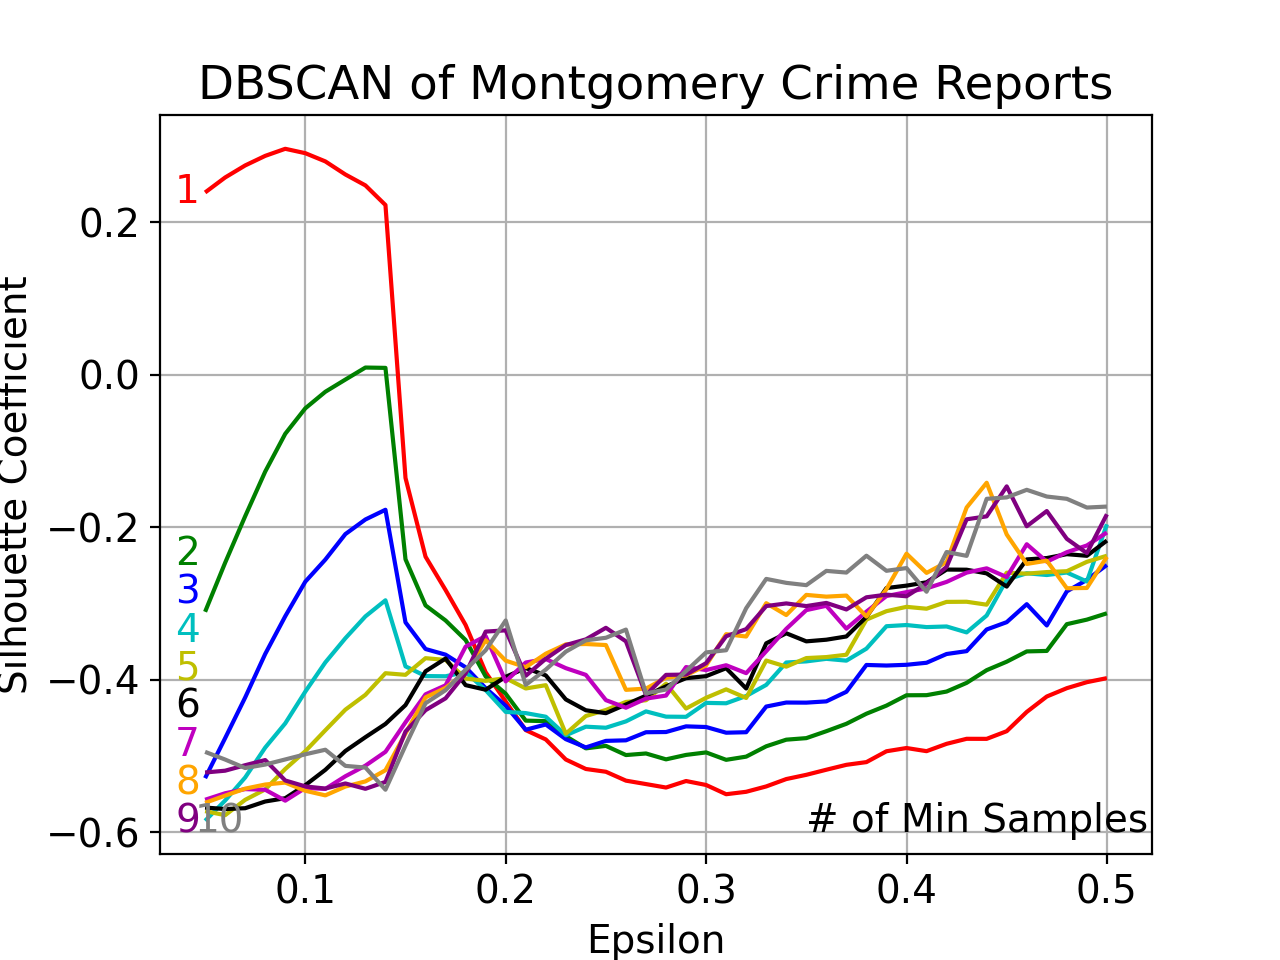

In [208]:
# Plotting the Results

from matplotlib.collections import LineCollection

crime_sil_scores_array = np.asarray(crime_sil_scores)
crime_colors = ['r', 'g', 'b', 'c', 'y', 'k', 'm', 'orange', 'purple', 'grey']

crime_plt_eps = np.tile(epsilon, crime_sil_scores_array.shape[0]).reshape(*crime_sil_scores_array.shape)
crime_v = np.stack((crime_plt_eps, crime_sil_scores), axis = -1)
crime_c = LineCollection(crime_v, colors=crime_colors)

fig, ax = plt.subplots()
ax.add_collection(crime_c)
ax.autoscale()
ax.set_title('DBSCAN of Montgomery Crime Reports')
ax.annotate('1', xy=(0.04, 0.225), xytext=(0.035, 0.225), color = 'r')
ax.annotate('2', xy=(0.04, -0.25), xytext=(0.035, -0.25), color = 'g')
ax.annotate('3', xy=(0.04, -0.3), xytext=(0.035, -0.3), color = 'b')
ax.annotate('4', xy=(0.04, -0.35), xytext=(0.035, -0.35), color = 'c')
ax.annotate('5', xy=(0.04, -0.4), xytext=(0.035, -0.4), color = 'y')
ax.annotate('6', xy=(0.04, -0.45), xytext=(0.035, -0.45), color = 'k')
ax.annotate('7', xy=(0.04, -0.5), xytext=(0.035, -0.5), color = 'm')
ax.annotate('8', xy=(0.04, -0.55), xytext=(0.035, -0.55), color = 'orange')
ax.annotate('9', xy=(0.04, -0.6), xytext=(0.035, -0.6), color = 'purple')
ax.annotate('10', xy=(0.05, -0.6), xytext=(0.045, -0.6), color = 'grey')
ax.annotate('# of Min Samples', xy=(0.4, -0.6), xytext=(0.35, -0.6))
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


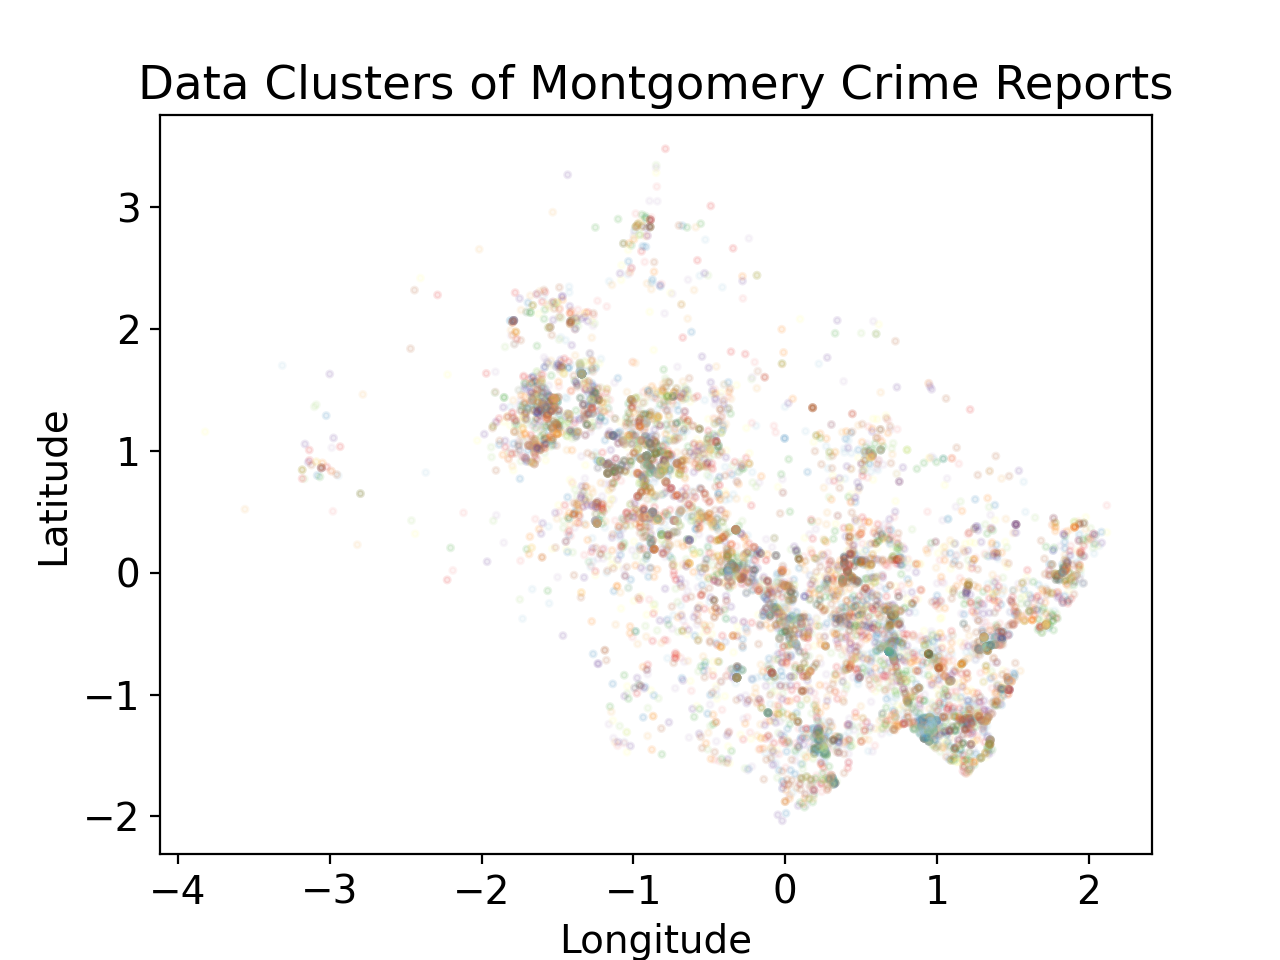

Text(0.5, 0, 'Longitude')

In [223]:
# Cluster plotting 1

fig = plt.figure()
plt.scatter(crime_scaled.Longitude, crime_scaled.Latitude, 
            alpha=.1, s=5, c=crime_scaled.cluster, cmap='Paired')
plt.title('Data Clusters of Montgomery Crime Reports')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

<IPython.core.display.Javascript object>


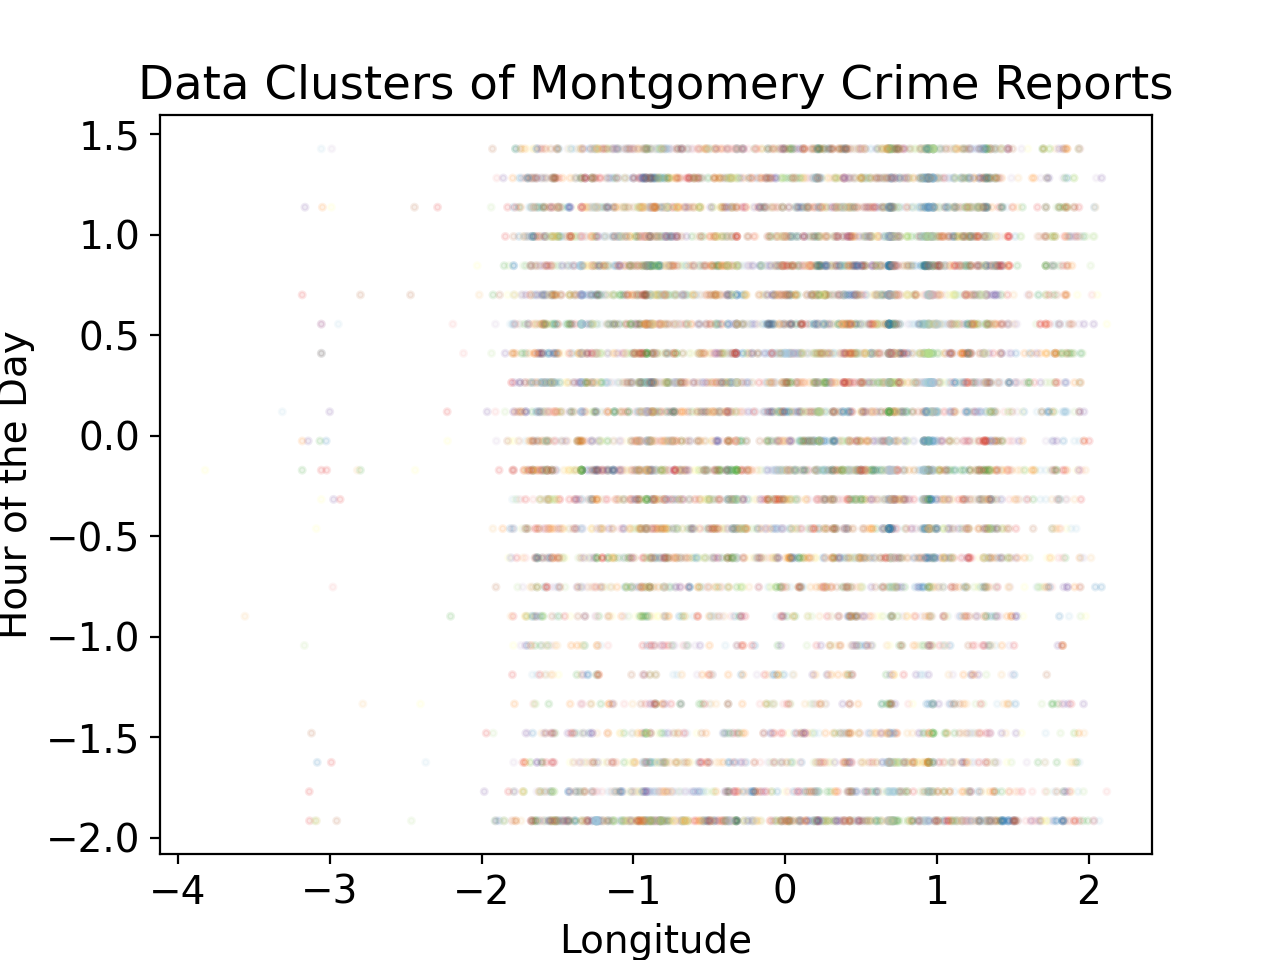

Text(0.5, 0, 'Longitude')

In [224]:
# Cluster plotting 2

fig = plt.figure()
plt.scatter(crime_scaled.Longitude, crime_scaled.Hour_of_Day, 
            alpha=.1, s=5, c=crime_scaled.cluster, cmap='Paired')
plt.title('Data Clusters of Montgomery Crime Reports')
plt.ylabel('Hour of the Day')
plt.xlabel('Longitude')


<IPython.core.display.Javascript object>


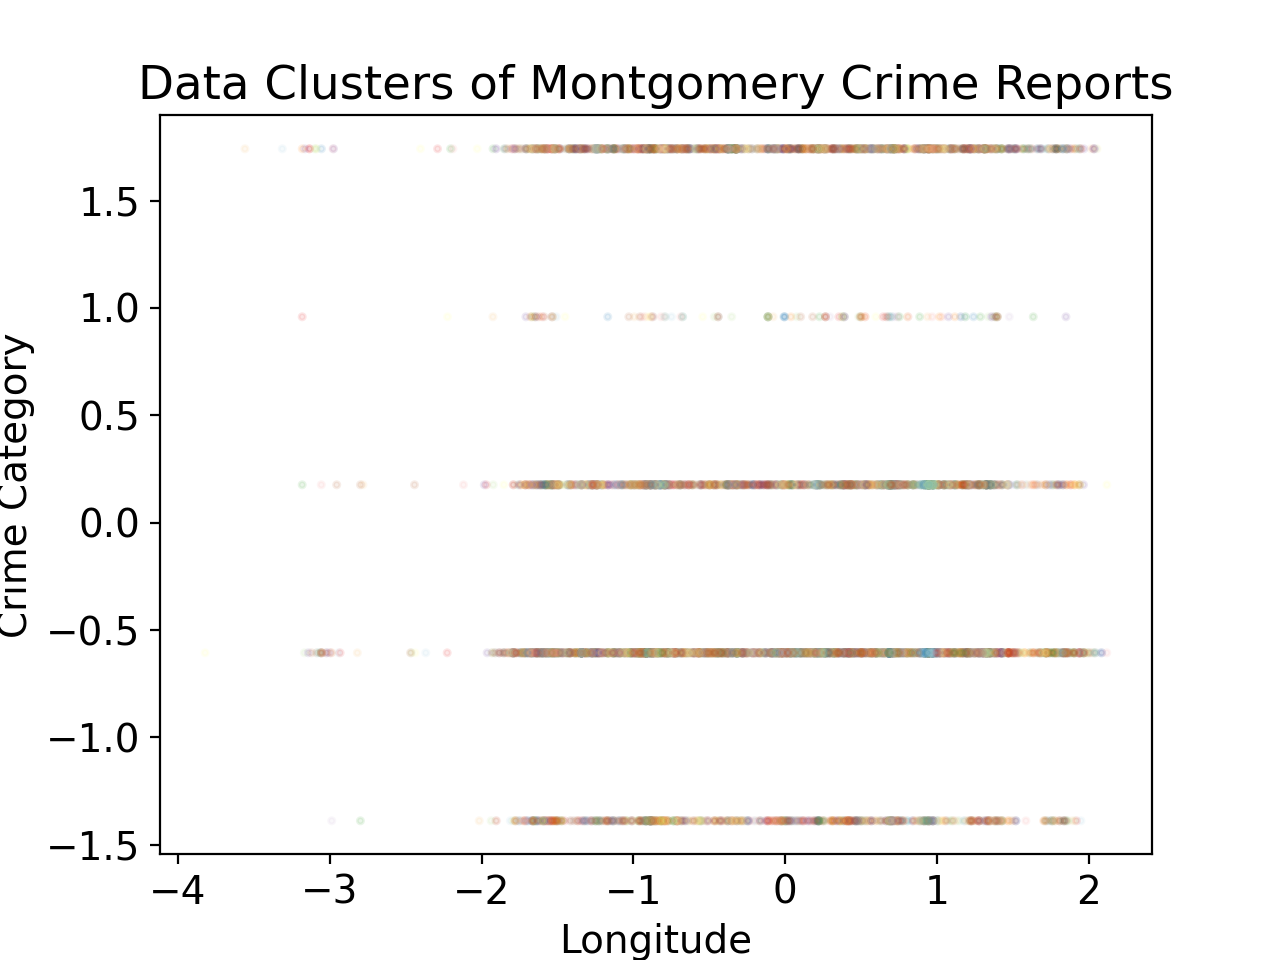

Text(0.5, 0, 'Longitude')

In [225]:
# Cluster plotting 3

fig = plt.figure()
plt.scatter(crime_scaled.Longitude, crime_scaled.Crime_Cat, 
            alpha=.1, s=5, c=crime_scaled.cluster, cmap='Paired')
plt.title('Data Clusters of Montgomery Crime Reports')
plt.ylabel('Crime Category')
plt.xlabel('Longitude')

In [215]:
# PCA Setup

from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [217]:
# Dataset Prep

crime_pca = crime_scaled.copy()

crime_pca = crime_pca.drop(columns = ['Crime Name1','City', 'Place'])

crime_pca.head()

,Latitude,Longitude,Hour_of_Day,Crime_Cat
Incident ID,,,,
201227438,0.796172,-2.943855,0.556458,-0.605847
201091764,0.132083,1.392993,-1.769114,0.176574
201222638,0.670153,-0.618699,0.847154,-0.605847
201313197,0.353284,-0.326246,-0.606328,1.741417
201198665,0.460492,-1.351632,1.428547,-0.605847


In [218]:
# PCA Process

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(crime_pca)
crime_trans = pca.transform(crime_pca)
crime_trans

array([[ 2.58211125, -1.00776809, -0.0427214 ],
       [-0.76631343,  1.42090494,  1.16547732],
       [ 0.83442251, -1.08392966, -0.20915608],
       ...,
       [-1.59340151, -0.51354379,  0.27385849],
       [-0.73502934, -0.77287471,  0.04096059],
       [-1.59686051, -0.51349789,  0.27405024]])